In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import os
import cv2
from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [4]:
X = np.load("DataForSVM/XDistDATA.npy")
y = np.load("DataForSVM/yDistLabels.npy")
#print(len(X))
#print(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(len(X_train))
print(len(X_test))

5566
1392


In [5]:
y_train_binarized = label_binarize(y_train, classes = [0,1,2,3,4,5,6,7])
y_test_binarized = label_binarize(y_test, classes = [0,1,2,3,4,5,6,7])

print(X_train[:2])
print(y_train[:2])
print(X_test[:2])
print(y_test[:2])
print(y_train_binarized[:2])
print("ytestbin:",y_test_binarized[:2])

[[0.03306811 0.02460417 0.02163008 0.02026076 0.02543335 0.02605774
  0.02343151 0.01731431 0.0024383  0.01214647 0.04477776 0.08004777
  0.01128881 0.01179574 0.01730052 0.03430451 0.00523804 0.0349786
  0.         0.03360657 0.05482653 0.03288079 0.08841109 0.0904956
  0.08529456]
 [0.01220223 0.00880626 0.0144464  0.02708317 0.03832436 0.00400366
  0.01931908 0.05590513 0.         0.00350501 0.04903034 0.06698304
  0.00259382 0.02304629 0.04290092 0.01090041 0.01289391 0.01136797
  0.         0.0648334  0.10333054 0.06925525 0.06606434 0.07980505
  0.06066799]]
[0 3]
[[0.01813677 0.01591639 0.01599554 0.01557764 0.0123883  0.01417939
  0.00217759 0.01133451 0.         0.0033998  0.00658824 0.01647103
  0.00338782 0.00648452 0.02116661 0.01827163 0.01781292 0.01538157
  0.01337281 0.02237284 0.02038623 0.02282161 0.01889069 0.01251132
  0.02141748]
 [0.00922441 0.00606499 0.01206964 0.00165144 0.00825826 0.00187613
  0.00755729 0.00514846 0.         0.00156213 0.0290709  0.0670533
  

In [6]:
random_state = np.random.RandomState(0)
import time
start_time = time.time()
#Create the classifier
clf = OneVsRestClassifier(svm.SVC(kernel='linear', probability = True, random_state = random_state))

y_score = clf.fit(X_train, y_train).decision_function(X_test)

#Predict the test data
y_pred = clf.predict(X_test)

print("Time: %s seconds" % (time.time()-start_time))
print(y_pred[:2])

Time: 11.086882829666138 seconds
[6 0]


In [7]:
#save model
import pickle
filename = 'Models/svm_model_distance_features.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [8]:
#Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred, target_names = ['Arabesque','Demi-Plie','Developpe','Penche','Retire','Second-Position','Sus-sous','Tendu']))

                 precision    recall  f1-score   support

      Arabesque       0.59      0.92      0.72       190
      Demi-Plie       0.67      0.10      0.17       184
      Developpe       0.70      0.89      0.78       175
         Penche       0.83      0.57      0.67       169
         Retire       0.82      0.25      0.38       168
Second-Position       0.30      0.45      0.36       155
       Sus-sous       0.52      0.47      0.49       185
          Tendu       0.56      0.96      0.71       166

       accuracy                           0.58      1392
      macro avg       0.62      0.58      0.54      1392
   weighted avg       0.63      0.58      0.54      1392



In [9]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5761494252873564


In [10]:
print("Recall:", metrics.recall_score(y_test, y_pred, average = 'macro'))

Recall: 0.5752943550406429


In [11]:
print("Precision:", metrics.precision_score(y_test, y_pred, average = 'macro'))

Precision: 0.6242925081865024


In [12]:
print("F1 score:", metrics.f1_score(y_test,y_pred, average = 'macro'))

F1 score: 0.5368847600386266


EER:0.16087744255996514
Equal Error Rate: 0.1608774425599651392


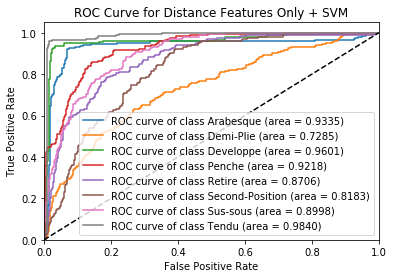

In [26]:
import matplotlib.pyplot as plt
#ROC and AUC
fpr = dict()
tpr = dict()
fnr = dict()
eer = dict()
totalEER = 0
roc_auc = dict()
n_classes = 8

#print(y_test.shape)
#print(y_score.shape)
#print(y_test_binarized.shape)
#Compute ROC curve for each class:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    fnr[i] = 1 - tpr[i]
    eer[i] = fpr[i][np.nanargmin(np.absolute((fnr[i]-fpr[i])))]
    totalEER += eer[i]
    roc_auc[i] = auc(fpr[i], tpr[i])
    
averageEER = totalEER/8
print("EER:" +averageEER.astype(str))
print('Equal Error Rate: {0:0.19f}'''.format(averageEER))
    
#Compute micro-average ROC curve and ROC area
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
#Plot ROC Curves:
plt.figure()

# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]))

arr_classes = ['Arabesque','Demi-Plie','Developpe','Penche','Retire','Second-Position','Sus-sous','Tendu']


for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(arr_classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Distance Features Only + SVM')
plt.legend(loc="lower right")
plt.show()

In [15]:
from sklearn.metrics import roc_auc_score
print("ROC AUC Score:", roc_auc_score(y_test_binarized,y_score, average = 'macro'))

ROC AUC Score: 0.8895795196768536


In [16]:
#confusion matrix
print(confusion_matrix(y_test,y_pred))


[[175   0   2  13   0   0   0   0]
 [ 22  18   7   0   5  67  40  25]
 [  7   0 155   0   0   0   0  13]
 [ 59   0   8  96   0   6   0   0]
 [ 11   0  29   1  42  47  13  25]
 [ 20   4   8   1   2  70  27  23]
 [  2   4  11   1   2  40  87  38]
 [  0   1   2   4   0   0   0 159]]


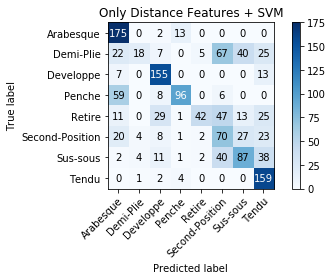

In [25]:
#Plot a confusion matrix
from sklearn.utils.multiclass import unique_labels
cm = confusion_matrix(y_test,y_pred)
cmap = plt.cm.Blues
classes = ['Arabesque','Demi-Plie','Developpe','Penche','Retire','Second-Position','Sus-sous','Tendu']

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Only Distance Features + SVM',
           ylabel='True label',
           xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()


In [18]:
# get the FP, FN, TP, TN values
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
print("FP:", FP)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
print("FN:", FN)
TP = np.diag(conf_matrix)
print("TP:", TP)
TN = conf_matrix.sum() - (FP + FN + TP)
print("TN:", FP)

[[175   0   2  13   0   0   0   0]
 [ 22  18   7   0   5  67  40  25]
 [  7   0 155   0   0   0   0  13]
 [ 59   0   8  96   0   6   0   0]
 [ 11   0  29   1  42  47  13  25]
 [ 20   4   8   1   2  70  27  23]
 [  2   4  11   1   2  40  87  38]
 [  0   1   2   4   0   0   0 159]]
FP: [121   9  67  20   9 160  80 124]
FN: [ 15 166  20  73 126  85  98   7]
TP: [175  18 155  96  42  70  87 159]
TN: [121   9  67  20   9 160  80 124]


In [19]:
FAR = (sum(FP))/(sum(FP)+sum(TN))
print("My FAR:", FAR)

My FAR: 0.06055008210180624


In [20]:
totalFAR = 0
for x in range(8):
    totalFAR += (FP[x])/(FP[x]+TN[x])
print("TotalFAR:", totalFAR)
avg = totalFAR/8
print("Computed Average FAR:", avg)

TotalFAR: 0.48364261756913485
Computed Average FAR: 0.060455327196141856


In [21]:
FRR = (sum(FN))/(sum(FN)+sum(TP))
print("My FRR:", FRR)

My FRR: 0.4238505747126437


In [22]:
totalFRR = 0
for x in range(8):
    totalFRR += (FN[x])/(FN[x]+TP[x])
print("TotalFRR:", totalFRR)
avg = totalFRR/8
print("Computed Average FRR:", avg)

TotalFRR: 3.397645159674857
Computed Average FRR: 0.42470564495935714


In [23]:
#Specificity: TN/(TN+FP)
totalSpecificity = 0
for x in range(8):
    totalSpecificity += (TN[x])/(TN[x]+FP[x])
print("TotalSpecificity:", totalSpecificity)
avg = totalSpecificity/8
print("Computed Average Specificity:", avg)

TotalSpecificity: 7.516357382430865
Computed Average Specificity: 0.9395446728038581


In [24]:
#y_score = clf.predict_proba(X_test)
print(y_score[:1])

[[-1.11811448 -0.99993889 -1.07618061 -1.20153609 -1.00004056 -0.99991837
  -0.9998446  -1.03241127]]
